<a href="https://colab.research.google.com/github/xinmiaow/CPSC533R/blob/master/lecture2_tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Playing with the mandelbrot set in pytorch

From https://medium.com/@krzysztof.pieranski/mandelbrot-set-with-pytorch-d006827fb887

In [2]:
import torch
import matplotlib.pyplot as plt #for plotting

def compute_Mandelbrot(xmin = -2.4, xmax = 1.2, ymin = -1.2, ymax = 1.2, w = 3200, h = 2400, maxiter = 256):
    x = torch.linspace(xmin, xmax, w) #w = window's width in pixels; xmin, xmax = left and right borders of the window
    y = torch.linspace(ymin, ymax, h) #h = window's height in pixels; ymin, ymax = bottom and up borders of the window
    
    #create two tensors, containing respectively all x and y coordinates of all the points in the window. c=[cx,cy]
    cx, cy = torch.meshgrid([x,y])
   
    #set initial value of variable z to zero for the z=z^2+c iteration
    zx = torch.zeros((w,h))
    zy = torch.zeros((w,h))
    
    #will represent the color of the pixel, ininitialy 0. Tensor's shape is the same as that of cx, cy, zx and zy
    k = torch.zeros(w,h)
    
    #main loop implementing z = z**2 + c iteration:
    #z**2 + c = (zx+zyi)**2 + (cx+cyi) = (zx**2-zy**2+cx)+(2*zx*zy+cy)i
    for i in range(maxiter):
        zx2 = zx**2
        zy2 = zy**2
        #inf is a tensor containing all the points for which zx2+zy2>4
        inf = (zx2+zy2)>4 #if zx2+zy2>4 then sqrt(zx2+zy2)>2, i.e. point's distance from (0,0) is >2, i.e. it will escape to inifinity; 
        k[inf] = i #for all the points escaping to infinity, store the number of iteration when that was this discovered
        zxn = zx2 - zy2 + cx #
        zyn = 2*zx*zy + cy
        zx = zxn
        zy = zyn
    img_gray = k.t() / 256
    img_color = torch.stack([img_gray**2,img_gray,img_gray**0.3], dim=-1).clamp(0,1)
    return img_color

%time img_color = compute_Mandelbrot(xmin = -2.4, xmax = 1.2, ymin = -1.2, ymax = 1.2, w = 320, h = 240, maxiter = 256)

CPU times: user 125 ms, sys: 10.2 ms, total: 135 ms
Wall time: 223 ms


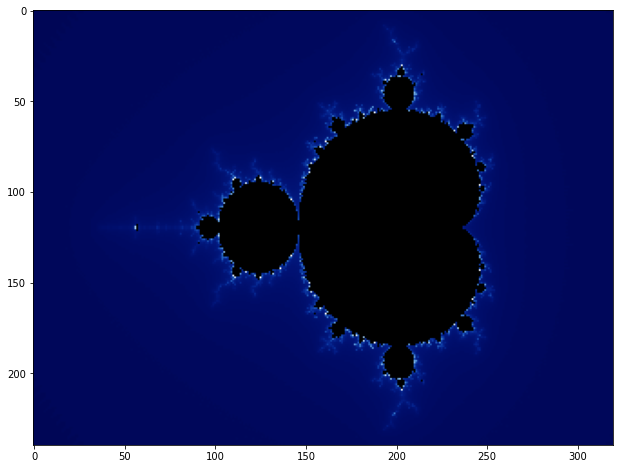

In [3]:
plt.figure(figsize = (12,8))
plt.imshow(img_color, cmap='gray')

# Your task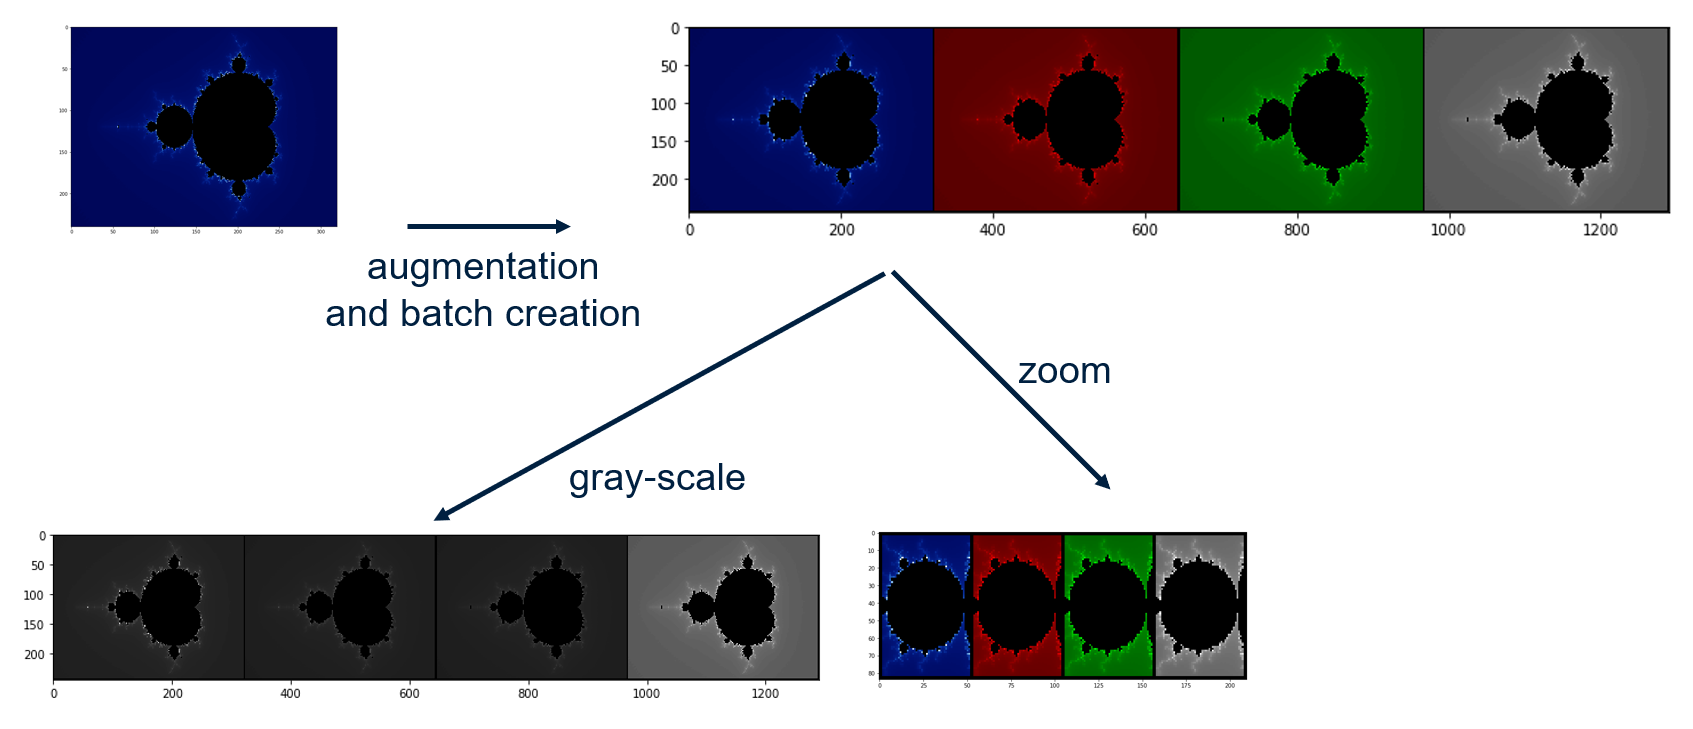

### Useful functions
 
```Tensor.size()``` https://pytorch.org/docs/stable/tensors.html#torch.Tensor.size

```Tensor.permute``` https://pytorch.org/docs/stable/tensors.html#torch.Tensor.permute|

```torch.stack``` https://pytorch.org/docs/master/generated/torch.stack.html

```make_grid``` https://pytorch.org/docs/stable/torchvision/utils.html#torchvision.utils.make_grid

Optional are ```torch.zeros```, ```torch.clone```, ```torch.sum```, ```torch.max``` and other pytorch functions you may find useful.

Note that make_grid expects the color channels in the second dimension and imshow in the last.

In [6]:
img_color.shape
img_color_pytorch = img_color.permute(2, 0, 1)
t = torch.stack([img_color_pytorch, img_color_pytorch])
t[:,:,:100,:].shape

torch.Size([2, 3, 100, 320])

### Task 1

Create a batch of four mandelbrot set images, i.e., a four-dimensional tensor, and show it using ```make_grid``` and ```plt.imshow```. Use tensor slicing and the pytorch functions listed above to inspect and transform the given image ```img_color```

torch.Size([240, 320, 3])


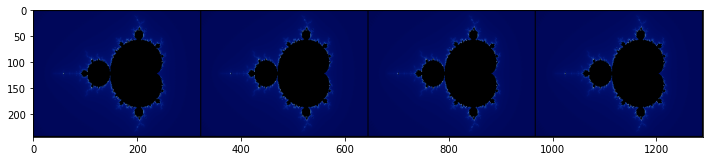

In [10]:
from torchvision.utils import make_grid

print(img_color.shape)
img_color_pytorch = img_color.permute(2, 0, 1)
batch = torch.stack([img_color_pytorch, img_color_pytorch, img_color_pytorch, img_color_pytorch])

batch_img = make_grid(batch)
plt.figure(figsize = (12,8))
plt.imshow(batch_img.permute([1,2,0]))

### Task 2
Modify the mandelbrot set images to have different colors and display it.

In [ ]:
batch = # TODO

batch_img = make_grid(batch)
plt.figure(figsize = (12,8))
plt.imshow(batch_img.permute([1,2,0]))

### Task 3
Use the batch, the four-dimensional tensor that contains all four images to create a zoomed version.


In [ ]:
batch_small = # TODO

batch_img = make_grid(batch_small)
plt.figure(figsize = (12,8))
plt.imshow(batch_img.permute([1,2,0]))

### Task 4
Merge the three color channels to gray-scale.

In [ ]:
batch_gray = # TODO
batch_img = make_grid(batch_gray)
plt.figure(figsize = (12,8))
plt.imshow(batch_img.permute([1,2,0]))

## Bonus: Are you bored?

Port a star shader to pytorch https://www.shadertoy.com/view/XlfGRj